# Fitting neural nets, part 2

In this notebook, we continue our journey with gradient descent.  In the previous notebook, we focused on the relatively simple case of minimizing a scalar-valued, scalar-input function.  Here, we'll take a look at how we generalize gradient descent to minimize functions of multiple variables.  This is almost always the situation when minimizing loss functions in machine learning.

Again, why are we doing this?  Well, because it is interesting, but also, because _you really do need at least a basic understanding of how this works to use neural nets effectively_.

You might want to have the notebook for part 1 open as a reference while you work on this notebook.

## Minimizing a loss function of multiple variables

### 1. The model

As a reminder, the equation for our simple fuel efficiency model is:

$$ \hat{mpg} = a + b \cdot hp. $$

Here, $ a $ and $ b $ are unknown constants, $ hp $ is our input, and $ \hat{mpg} $ is our output.

We can write this more generally by replacing $ hp $ with $ x $ and $ \hat{mpg} $ with $ \hat{y} $.

$$ \hat{y} = a + bx .$$


As we've seen, we can model this relationship using a single neuron with a single input.

<div>
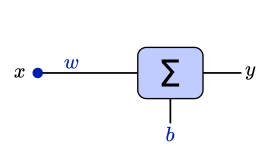
</div>

In this case, we can write our model equation as

$$ \hat{y} = wx + b . $$

### 2. The loss function

Recall that, when fitting a supervised machine learning model, we need a loss function to evaluate how far from "the truth" our model is given the model's parameter values.  For regression problems, our standard loss is the _squared error_:

$$ SE = (y_0 - \hat{y_0})^2 = (y_0 - (wx_0 + b))^2. $$

Recall also that, given a set of $(x, y)$ observations, $(x_i, y_i); i = 1 ... N$ , we can calculate the average squared error over the entire dataset, which gives us the _mean squared error_:

$$ MSE = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y_i})^2 = \frac{1}{N} \sum_{i=1}^N (y_i - (wx_i + b))^2 .$$

Our goal is to find values of $w$ and $b$ that make $MSE$ as small as possible.  In this setting, MSE can be viewed _as a function of the parameters_ $w$ and $b$:

$$ MSE(w, b) = \frac{1}{N} \sum_{i=1}^N (y_i - (wx_i + b))^2 .$$


### 3. Minimizing the loss

When fitting our neural network model to the fuel efficiency data, we can use gradient descent to find the best values of $w$ and $b$.  Previously, we looked in some detail at how gradient descent works in the single-variable case.  For fitting neural networks, even the simplest case of a single-input neuron requires that we extend our simple formulation of gradient descent to a multi-variable setting.

I have decided not to go over the math behind the multi-variable version of gradient descent in class.  This does not suggest in any way that the math is not important!  To the contrary, understanding how gradient descent works in the general case will give you valuable insight into how neural network models are estimated - after all, the multi-variable setting is where the name "gradient descent" comes from in the first place!  Furthermore, you pretty much need to have some understanding of the math to make sense of the more advanced optimization algorithms that are often used in deep learning.  So, I definitely encourage you to explore this more on your own.  Also, because we're not covering the math, we're not going to implement the multi-variable algorithm from scratch.  Again, though, I highly encourage you to do this as an optional homework exercise!

Okay, so that all said, here is what we _will_ do.  We've already developed some good inuition about gradient descent by exploring the single-variable case.  Today, we'll use experimentation and visualization to try to extend that intuition to the more general case.

### 4. Investigating training hyperparameters

We will begin by exploring two of the most important _hyperparameters_ for training a neural network: the learning rate and the number of parameter update steps to use for training.

Let's first get the imports we need and load our trusty old fuel efficiency dataset.

In [ ]:
import numpy as np
import pandas as pd

import plotnine as pn

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import torch
from torch import nn
from skorch import NeuralNetRegressor

In [ ]:
df = pd.read_csv('data/auto_mpg.csv')
#df = pd.read_csv('/blue/zoo4926/share/Jupyter_Content/data/auto_mpg.csv')

**Exercise:** Re-implement the single-neuron, single-input neural net from the previous notebook, again using $hp$ and $mpg$ as our input and output variables.  Use the previous notebook as a reference.

Fit the neural network to the data using $lr = 0.1$ and $epochs = 40$.

(Aside: Why am I repeatedly asking you to do these sorts of things rather than just giving you the code?  Because a substantial body of education research suggests that _the more you do and explore yourself_, the _more you are likely to learn_.  Even copying and modifying code from a previous notebook requires some thinking. 🙂)

It is often very useful to visualize the results of training a neural net.  One fundamental visualization is graphing the training loss.  Let's look at how we can do that.

Skorch captures data about the training process in a _class attribute_ called `history`, which we can easily convert to a Pandas dataframe.

**Exercise:** Graph the change in the loss over the course of your neural net training.

Let's explore how the learning rate influences the training process by using some experiments to answer a few questions.

1. Did your model training converge on the minimum loss?  I.e., did it find the optimal parameter values?
2. What happens if we decrease the learning rate?
3. What happens if we increase the learning rate?
4. What is the general relationship between the learning rate and the number of epochs required for convergence?

### 5. The effect of data scaling

So far, we've been transforming our data using Scikit-learn's `StandardScaler` before we hand the data off to Skorch and Pytorch.  Does scaling and centering the data influence our results in any way?

**Excercise:** Copy your model fitting code from above into the cell below, remove (or comment out) the data scaling/centering, and fit your neural network to the data.  What do you observe?

Interesting, isn't it?  How might you explain your results?  Let's examine visualizations of the loss surface to see if we can gain some insight into what might be happening.

### 6. Conclusions

That's it for our investigation of gradient descent.  (Well, kind of.  We'll continue talking about gradient descent in the context of neural net training throughout this unit.)  You should now be able to understand many of the parameters we passed to `NeuralNetRegressor()` when we set up our neural net training.

As you've seen (I hope), gradient descent is an extremely powerful, very general method for finding the minimum of a function.  But, it's not always easy to make it "behave" in real-world applications, and if used carelessly, the results can be downright misleading.  Treating it as a "black box" is generally a bad idea.  Rather, you must have some understanding of how it works to use it well.